In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


General Information

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

DATA PRE-PROCESSING

In [8]:
#Drop Irrelevant coloumns
data = [train,test]
for i in data:
    i.drop("Loan_ID",inplace=True,axis=1)

In [9]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
for i in data:
    i["Gender"].value_counts()
    i["Gender"].fillna(i["Gender"].mode()[0],inplace=True)
    i["Married"].fillna(i["Married"].mode()[0],inplace=True)
    i["Dependents"].fillna(i["Dependents"].mode()[0],inplace=True)
    i["Self_Employed"].fillna(i["Self_Employed"].mode()[0],inplace=True)
    i["LoanAmount"].fillna(i["LoanAmount"].mean(),inplace=True)
    i["Loan_Amount_Term"].fillna(i["Loan_Amount_Term"].mode()[0],inplace=True)
    i["Credit_History"].fillna(i["Credit_History"].mode()[0],inplace=True)
    

In [11]:
for i in data:
    print(i.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


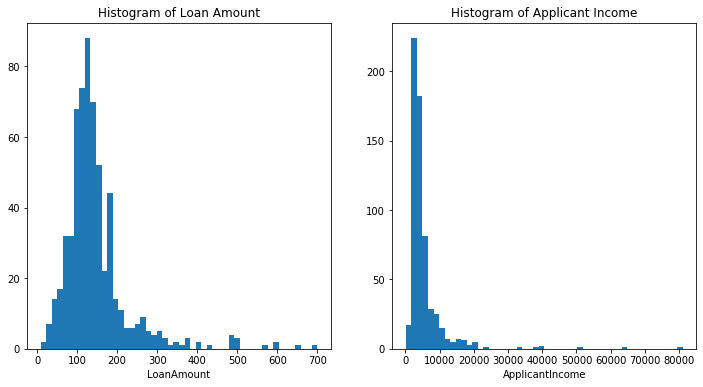

In [12]:
# Frequency charts for Loan Amount and Applicant Income
fig = plt.figure(figsize=(12, 6))
Amount = fig.add_subplot(121)
Income = fig.add_subplot(122)


Amount.hist(train['LoanAmount'], bins=50)
Amount.set_xlabel('LoanAmount')
Amount.set_title("Histogram of Loan Amount")

Income.hist(train['ApplicantIncome'], bins=50)
Income.set_xlabel('ApplicantIncome')
Income.set_title("Histogram of Applicant Income")



plt.show()

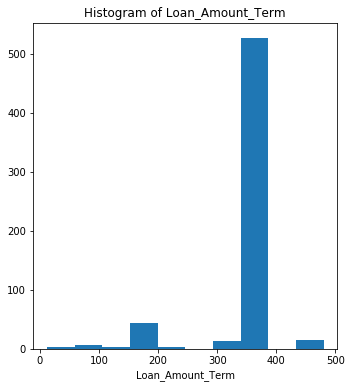

In [13]:
fig = plt.figure(figsize=(12, 6))
Term = fig.add_subplot(122)
Term.hist(train['Loan_Amount_Term'], bins=10)
Term.set_xlabel('Loan_Amount_Term')
Term.set_title("Histogram of Loan_Amount_Term")
plt.show()

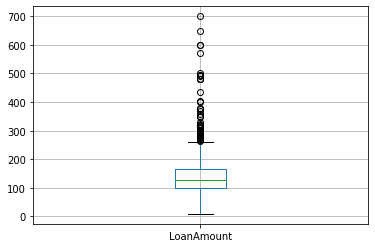

In [14]:
train.boxplot(column='LoanAmount')
plt.show()

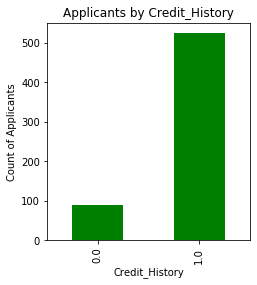

In [15]:
cred_history = train['Credit_History'].value_counts(ascending=True)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
cred_history.plot(kind='bar',color="green")
plt.show()

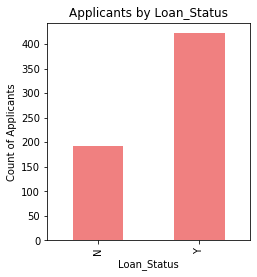

In [16]:
Loan_hist = train['Loan_Status'].value_counts(ascending=True)
# Loan Status vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Loan_Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Loan_Status")
Loan_hist.plot(kind='bar',color="lightcoral")
plt.show()

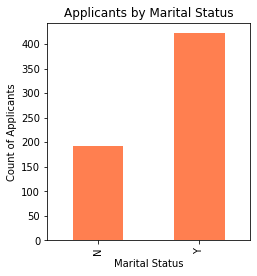

In [17]:
marital_hist = train['Married'].value_counts(ascending=True)
# marital status vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Marital Status")
Loan_hist.plot(kind='bar',color="coral")
plt.show()

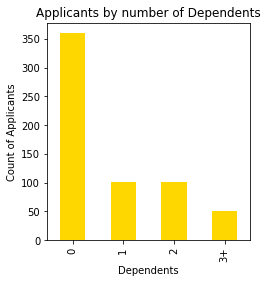

In [18]:
# count of applicants by Dependents
dep_hist= train['Dependents'].value_counts()
# Dependants vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Dependents')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by number of Dependents")
dep_hist.plot(kind='bar',color="gold")
plt.show()

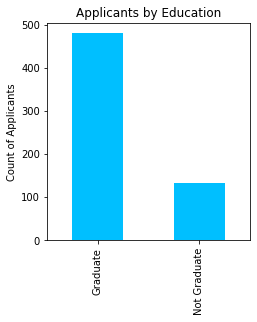

In [19]:
# count of applicants by Dependents
edu_hist= train['Education'].value_counts()
#Education vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Education")
edu_hist.plot(kind='bar',color="deepskyblue")
plt.show()

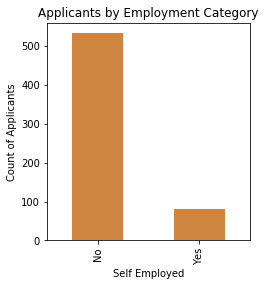

In [20]:
# count of applicants by Self_Employed
emp_hist= train['Self_Employed'].value_counts()
# Self_Employed vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self Employed')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Employment Category")
emp_hist.plot(kind='bar',color="peru")
plt.show()

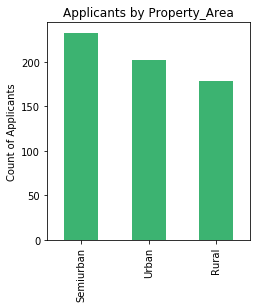

In [21]:
# count of applicants by Property_Area
prop_hist= train['Property_Area'].value_counts()
# Property_Area vs Count Of Applicants
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Property_Area")
prop_hist.plot(kind='bar',color="mediumseagreen")
plt.show()

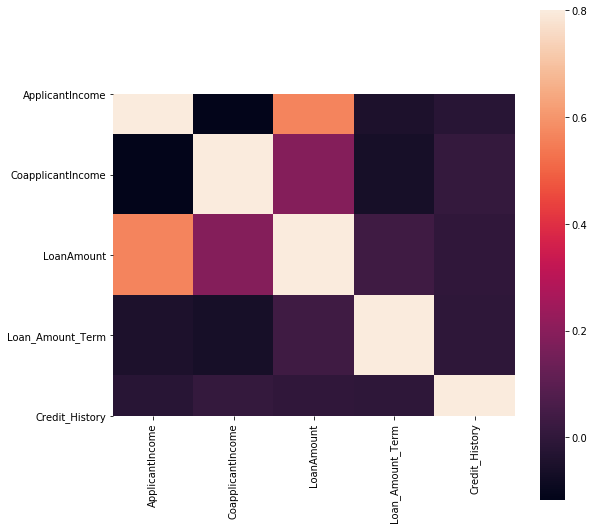

In [22]:
corrmat=train.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

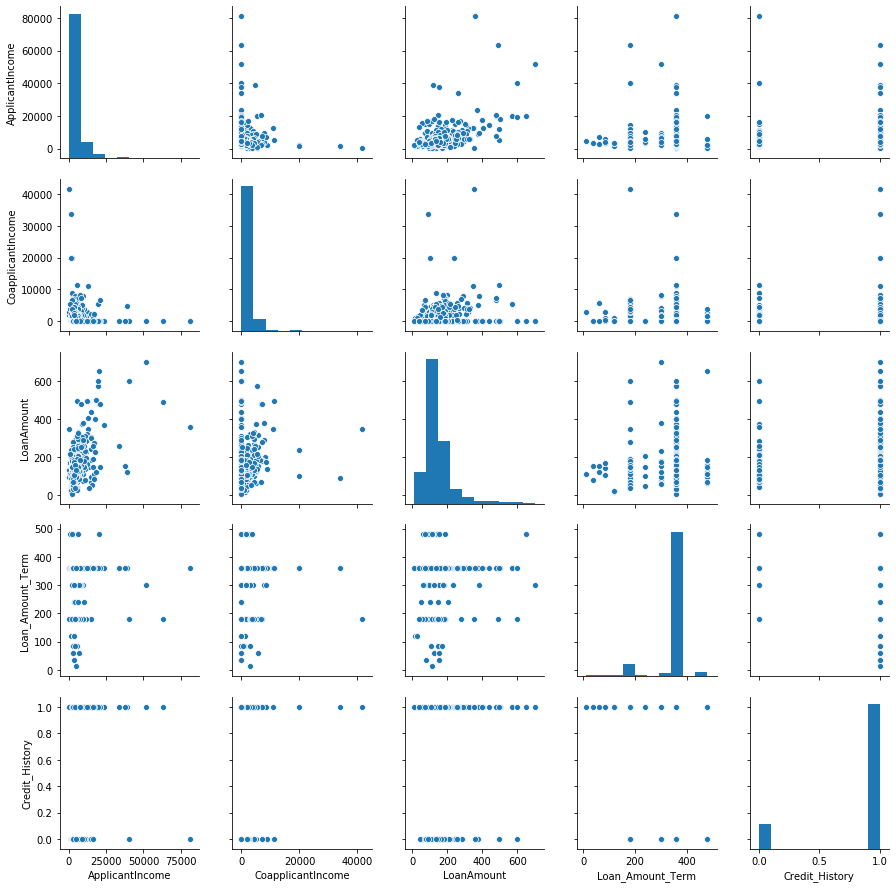

In [23]:
sns.pairplot(train)

In [24]:
train["Loan_Status"]=train["Loan_Status"].map({'Y':1,'N':0})
target = train["Loan_Status"].copy()
train.drop("Loan_Status",inplace=True,axis=1)

In [25]:
label_encoder = LabelEncoder()
col = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
for j in data:
    for i in col:
        j[i]= label_encoder.fit_transform(j[i]) 

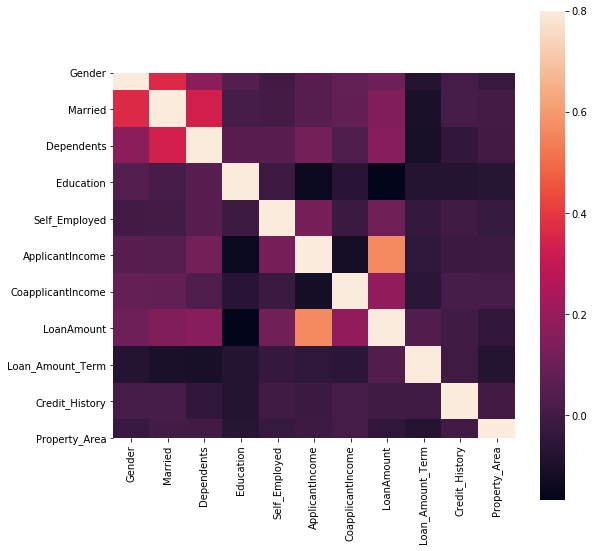

In [26]:
corrmat=train.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [27]:
onehotencoder = OneHotEncoder()
for i in data:
    i = onehotencoder.fit_transform(i).toarray()

In [28]:
train = pd.get_dummies(train, columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"])
test = pd.get_dummies(test, columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"])

In [29]:
train.dtypes
test.dtypes

ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Gender_0               uint8
Gender_1               uint8
Married_0              uint8
Married_1              uint8
Dependents_0           uint8
Dependents_1           uint8
Dependents_2           uint8
Dependents_3           uint8
Education_0            uint8
Education_1            uint8
Self_Employed_0        uint8
Self_Employed_1        uint8
Property_Area_0        uint8
Property_Area_1        uint8
Property_Area_2        uint8
dtype: object

In [30]:
# scaler = MinMaxScaler()
# col_to_scale = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
# train["ApplicantIncome"] = scaler.fit_transform(train[["ApplicantIncome"]])
# train["CoapplicantIncome"] = scaler.fit_transform(train[["CoapplicantIncome"]])
# train["LoanAmount"] = scaler.fit_transform(train[["LoanAmount"]])
# train["Loan_Amount_Term"] = scaler.fit_transform(train[["Loan_Amount_Term"]])

# test["ApplicantIncome"] = scaler.fit_transform(test[["ApplicantIncome"]])
# test["CoapplicantIncome"] = scaler.fit_transform(test[["CoapplicantIncome"]])
# test["LoanAmount"] = scaler.fit_transform(test[["LoanAmount"]])
# test["Loan_Amount_Term"] = scaler.fit_transform(test[["Loan_Amount_Term"]])

# scaler.transform(train)
# scaler.transform(test)
# train.head()

EDA CHARTS

In [31]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


DATA MODELLING

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(train,target, test_size=0.2)

RANDOM FOREST 

In [34]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
s1= accuracy_score(Y_test,y_pred)
s1

0.7967479674796748

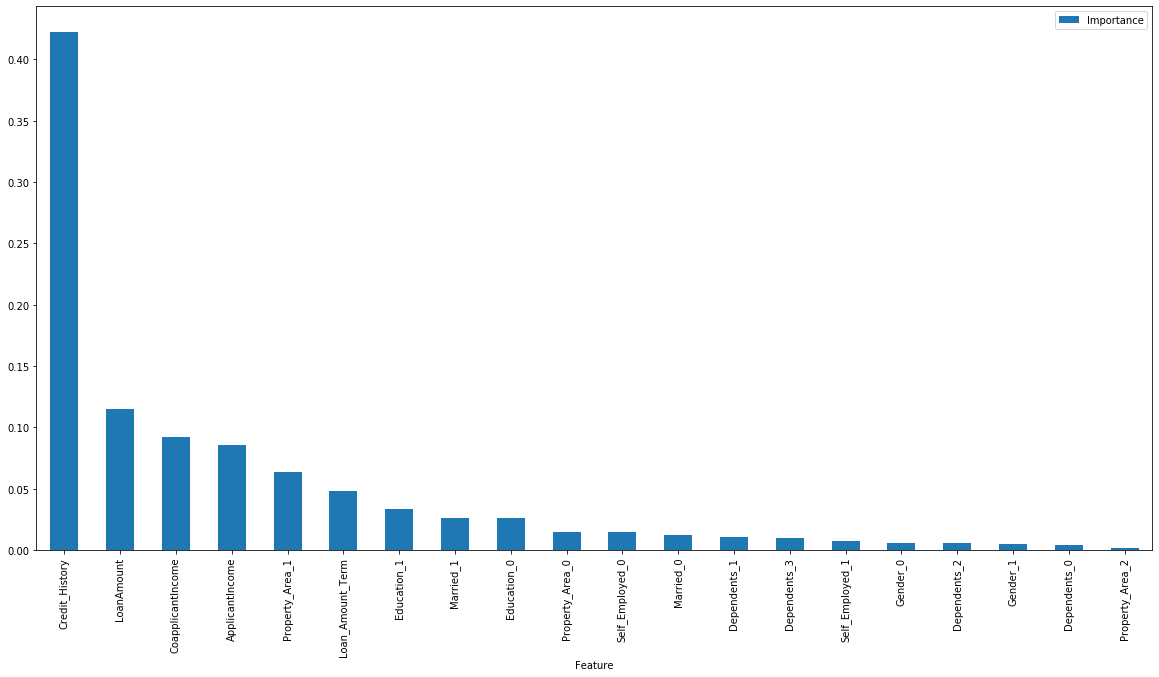

In [33]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
features.plot(kind='bar', figsize=(20, 10))

Support Vector Machine

In [37]:
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
s2 = accuracy_score(Y_test,y_pred)

In [38]:
s2

0.8130081300813008

Ridge Regreesion

In [35]:
clf = Ridge(alpha=0.1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

def ans(x):
    if(x>0.5):
        return 1
    else:
        return 0

y_pred_1 = np.array([ans(x) for x in y_pred])
s3 = accuracy_score(Y_test,y_pred_1)
s3

0.8130081300813008

Lasso Regression

In [36]:
clf = Lasso(alpha=0.1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

def ans(x):
    if(x>0.5):
        return 1
    else:
        return 0

y_pred_1 = np.array([ans(x) for x in y_pred])
s4 = accuracy_score(Y_test,y_pred_1)
s4

0.6747967479674797

Logistic Regression

In [39]:
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    grid.fit(X_train,Y_train)
    return grid.best_score_,grid.best_estimator_

clf = LogisticRegression()
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
Best_Accuracy, Best_classifier = cross_validation_best_parameters(clf,param_grid)
print("Best Training accuracy is "+ str(Best_Accuracy))
print(Best_classifier)
y_pred = Best_classifier.predict(X_test)

def ans(x):
    if(x>0.5):
        return 1
    else:
        return 0

y_pred_1 = np.array([ans(x) for x in y_pred])
s5 = accuracy_score(Y_test,y_pred_1)

Best Training accuracy is 0.8004073319755601
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


ANN

In [40]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1024, activation='relu', input_dim=20))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

Using TensorFlow backend.


In [41]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(
    X_train,
    Y_train,
    epochs=30,
    shuffle=True,
    verbose=1
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
491/491 [==============================] - 0s 955us/step - loss: 4.9353 - acc: 0.6904
Epoch 2/30
491/491 [==============================] - 0s 124us/step - loss: 4.9353 - acc: 0.6904
Epoch 3/30
491/491 [==============================] - 0s 91us/step - loss: 4.9353 - acc: 0.6904
Epoch 4/30
491/491 [==============================] - 0s 92us/step - loss: 4.9353 - acc: 0.6904
Epoch 5/30
491/491 [==============================] - 0s 131us/step - loss: 4.9353 - acc: 0.6904
Epoch 6/30
491/491 [==============================] - 0s 148us/step - loss: 4.9353 - acc: 0.6904
Epoch 7/30
491/491 [==============================] - 0s 139us/step - loss: 4.9353 - acc: 0.6904
Epoch 8/30
491/491 [==============================] - 0s 128us/step - loss: 4.9353 - acc: 0.6904
Epoch 9/30
491/491 [==============================] - 0s 104us/step - loss: 4.9353 - acc: 0.6904
Epoch 10/30
491/491 [===========

In [42]:
model_loss, model_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Normal Neural Network with data - Loss: {model_loss}, Accuracy: {model_accuracy}")
s6 = model_accuracy

123/123 [==============================] - 0s 379us/step
Normal Neural Network with data - Loss: 5.184515476226807, Accuracy: 0.6747967474828891


COMPARITIVE PLOT BETWEEN ALGORITHMS

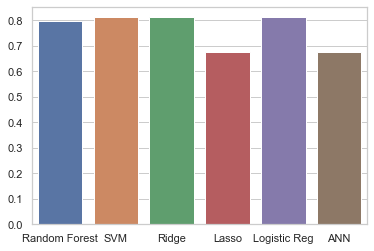

In [43]:
scores=[s1,s2,s3,s4,s5,s6]
Algo = ["Random Forest", "SVM","Ridge","Lasso","Logistic Reg","ANN"]
sns.set(style="whitegrid")
sns.barplot(Algo,scores)